# Problem 2

In [31]:
from igraph import *
import numpy as np

file_name = './Dataset/mammalia-voles-rob-trapping.edges'

In [11]:
def createGraph(file_name):
    g = Graph(directed=False)
    nodes = []
    max_vertex_id = 0
    with open(file_name) as f:
        for line in f.readlines():
            node_1, node_2 = int(line.split()[0]), int(line.split()[1])
            nodes.append([node_1, node_2])
            for n in nodes[len(nodes) - 1]:
                max_vertex_id = max(max_vertex_id, n)
    g.add_vertices(max_vertex_id + 1)
    for i in range(len(nodes)):
        g.add_edge(nodes[i][0], nodes[i][1])
    return g

g = createGraph(file_name)

## (a) Summary Dataset

In [16]:
def output(g):
    summary(g)
    print(f'Number of nodes: {g.vcount()}')
    print(f'Number of edges: {g.ecount()}')
    print(f'Average clustering coefficient: {g.transitivity_undirected()}')
    print(f'Diameter: {g.diameter()}')
    print(f'Mean degree: {sum(g.degree())/g.vcount()}')
    print(f'Maximum degree: {max(g.degree())}')

output(g)

IGRAPH U--- 1481 4569 -- 
Number of nodes: 1481
Number of edges: 4569
Average clustering coefficient: 0.2814581255429362
Diameter: 18
Mean degree: 6.170155300472653
Maximum degree: 39


## (b) Visualize

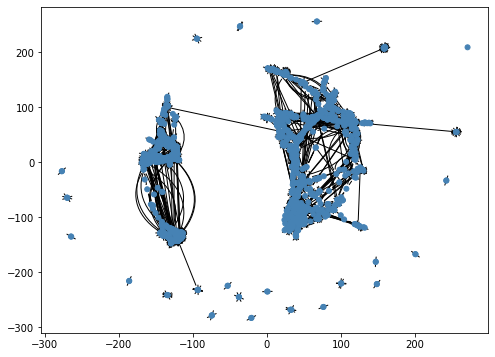

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
plot(g, target=ax)

## (c) Katz Centrality

In [129]:
K = 100

In [131]:
def random(k):
    a = np.random.rand()
    while a > 1/k:
        a = np.random.rand()
    return a

def Katz_centrality(g, beta=1):
    # adjacency matrix
    a = g.get_adjacency()
    A = np.zeros(a.shape)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            A[i][j] = 1 if a[i][j] > 1 else a[i][j]
    
    # alpha
    eigenvalues, _ = np.linalg.eig(A)
    k1 = np.max(eigenvalues)
    alpha = random(k1)

    # centrality
    x = np.zeros(A.shape[0])
    for i in range(15):
        x = alpha * np.matmul(A, x) + beta

    return np.argsort(x)[::-1][:K]

In [96]:
t10_Katz = Katz_centrality(g)
t10_Katz

array([  13,   62,  358,   93, 1023,  107,  321,   22,  221,   32],
      dtype=int64)

## (d) Compare w/ Other Centrailty Metrics

In [119]:
ec = np.array(g.eigenvector_centrality())
t10_eigen = np.argsort(ec)[::-1][:10]
t10_eigen

array([ 89, 193, 231, 111, 221, 196,   3,  13,  61,  22], dtype=int64)

In [110]:
close = np.array(g.closeness())
close[0] = 0
t10_closeness = np.argsort(close)[::-1][:10]
t10_closeness

array([ 956,  664,  759,  758,  936, 1298,  498,  662,  663,  499],
      dtype=int64)

In [118]:
harmonic = np.array(g.harmonic_centrality())
t10_harmonic = np.argsort(harmonic)[::-1][:10]
t10_harmonic

array([358, 196,  62,  61,  93,  13, 778, 192, 562, 355], dtype=int64)

Actually, there are 42 nodes with closeness centraily equals to 1(highest).

In [113]:
bt = np.array(g.betweenness())
t10_betweenness = np.argsort(bt)[::-1][:10]
t10_betweenness

array([ 778,  932,  928,  358,  999, 1023,  196,  973,  818, 1157],
      dtype=int64)

In [127]:
def compareT10(katz, other, k=10):
    cnt = 0
    for i in range(k):
        pivot = katz[i]
        for j in range(k):
            if pivot == other[j]:
                cnt +=1
    return cnt

In [125]:
print(f'[eigenvector] # of the same nodes in top-10: {compareT10(t10_Katz, t10_eigen)}')
print(f'[closeness] # of the same nodes in top-10: {compareT10(t10_Katz, t10_closeness)}')
print(f'[harmonic] # of the same nodes in top-10: {compareT10(t10_Katz, t10_harmonic)}')
print(f'[betweenness] # of the same nodes in top-10: {compareT10(t10_Katz, t10_betweenness)}')

[eigenvector] # of the same nodes in top-10: 3
[closeness] # of the same nodes in top-10: 0
[harmonic] # of the same nodes in top-10: 4
[betweenness] # of the same nodes in top-10: 2


In [134]:
# Compare with igraph API functions themselves
print(compareT10(t10_eigen, t10_closeness))
print(compareT10(t10_eigen, t10_betweenness))
print(compareT10(t10_eigen, t10_harmonic))
print(compareT10(t10_closeness, t10_betweenness))
print(compareT10(t10_closeness, t10_harmonic))
print(compareT10(t10_harmonic, t10_betweenness))

0
1
3
0
0
3


In [132]:
t100_Katz = Katz_centrality(g)

ec = np.array(g.eigenvector_centrality())
t100_eigen = np.argsort(ec)[::-1][:K]

close = np.array(g.closeness())
close[0] = 0
t100_closeness = np.argsort(close)[::-1][:K]

harmonic = np.array(g.harmonic_centrality())
t100_harmonic = np.argsort(harmonic)[::-1][:K]

bt = np.array(g.betweenness())
t100_betweenness = np.argsort(bt)[::-1][:K]

print(f'[eigenvector] # of the same nodes in top-{K}: {compareT10(t100_Katz, t100_eigen, K)}')
print(f'[closeness] # of the same nodes in top-{K}: {compareT10(t100_Katz, t100_closeness, K)}')
print(f'[harmonic] # of the same nodes in top-{K}: {compareT10(t100_Katz, t100_harmonic, K)}')
print(f'[betweenness] # of the same nodes in top-{K}: {compareT10(t100_Katz, t100_betweenness, K)}')

[eigenvector] # of the same nodes in top-100: 34
[closeness] # of the same nodes in top-100: 15
[harmonic] # of the same nodes in top-100: 48
[betweenness] # of the same nodes in top-100: 49


In [138]:
# Compare with igraph API functions themselves
print(compareT10(t100_eigen, t100_closeness, K))
print(compareT10(t100_eigen, t100_betweenness, K))
print(compareT10(t100_eigen, t100_harmonic, K))
print(compareT10(t100_closeness, t100_betweenness, K))
print(compareT10(t100_closeness, t100_harmonic, K))
print(compareT10(t100_harmonic, t100_betweenness, K))

8
19
44
30
40
53
